### Numpy basics

In [59]:
import numpy as np
import matplotlib.pyplot as plt

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [9]:
m = np.arange(12).reshape((3,4))
print('Original array:\n',m)
print('\nColumn means:', np.mean(m,axis=0))
print('\nRow means:',np.mean(m,axis=1))
print('\nOverall mean:', np.mean(m))

Original array:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Column means: [4. 5. 6. 7.]

Row means: [1.5 5.5 9.5]

Overall mean: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [11]:
# Let's define the arrays
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

In [30]:
print('Function outer from np:\n',np.outer(u,v))
print('Estimated runtime:')
%timeit np.outer(u,v)
print('\nNested for loop:\n',np.array([[u_i*v_j for v_j in v] for u_i in u]))
print('Estimated runtime:')
%timeit np.array([[u_i*v_j for v_j in v] for u_i in u])
print('\nNumpy broadcasting:\n',np.expand_dims(u,axis=-1) * v)
print('Estimated runtime:')
%timeit np.expand_dims(u,axis=-1) * v

Function outer from np:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Estimated runtime:
2.56 µs ± 13.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Nested for loop:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Estimated runtime:
7.15 µs ± 17.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Numpy broadcasting:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Estimated runtime:
3.65 µs ± 7.21 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [56]:
r_matrix = np.random.rand(10,6)
r_matrix[np.any(r_matrix < 0.1, axis=1), :] = 0
r_matrix

array([[0.12295286, 0.29988067, 0.54134009, 0.57227203, 0.93947087,
        0.60037195],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.77518988, 0.24987529, 0.76545467, 0.37558018, 0.38400062,
        0.16729145]])

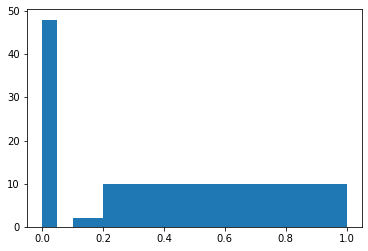

In [71]:
# We can confirm this result
plt.hist(r_matrix.flatten(), bins=[0,0.05,0.1,0.2,1]);

We can see that the algorithm works, since there are no numbers smaller than 0.1 different from 0.

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

Array from extracted elements (every 10th element in original array):
 [0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]
Reversed array:
 [5.71198664 5.07732146 4.44265628 3.8079911  3.17332591 2.53866073
 1.90399555 1.26933037 0.63466518 0.        ]


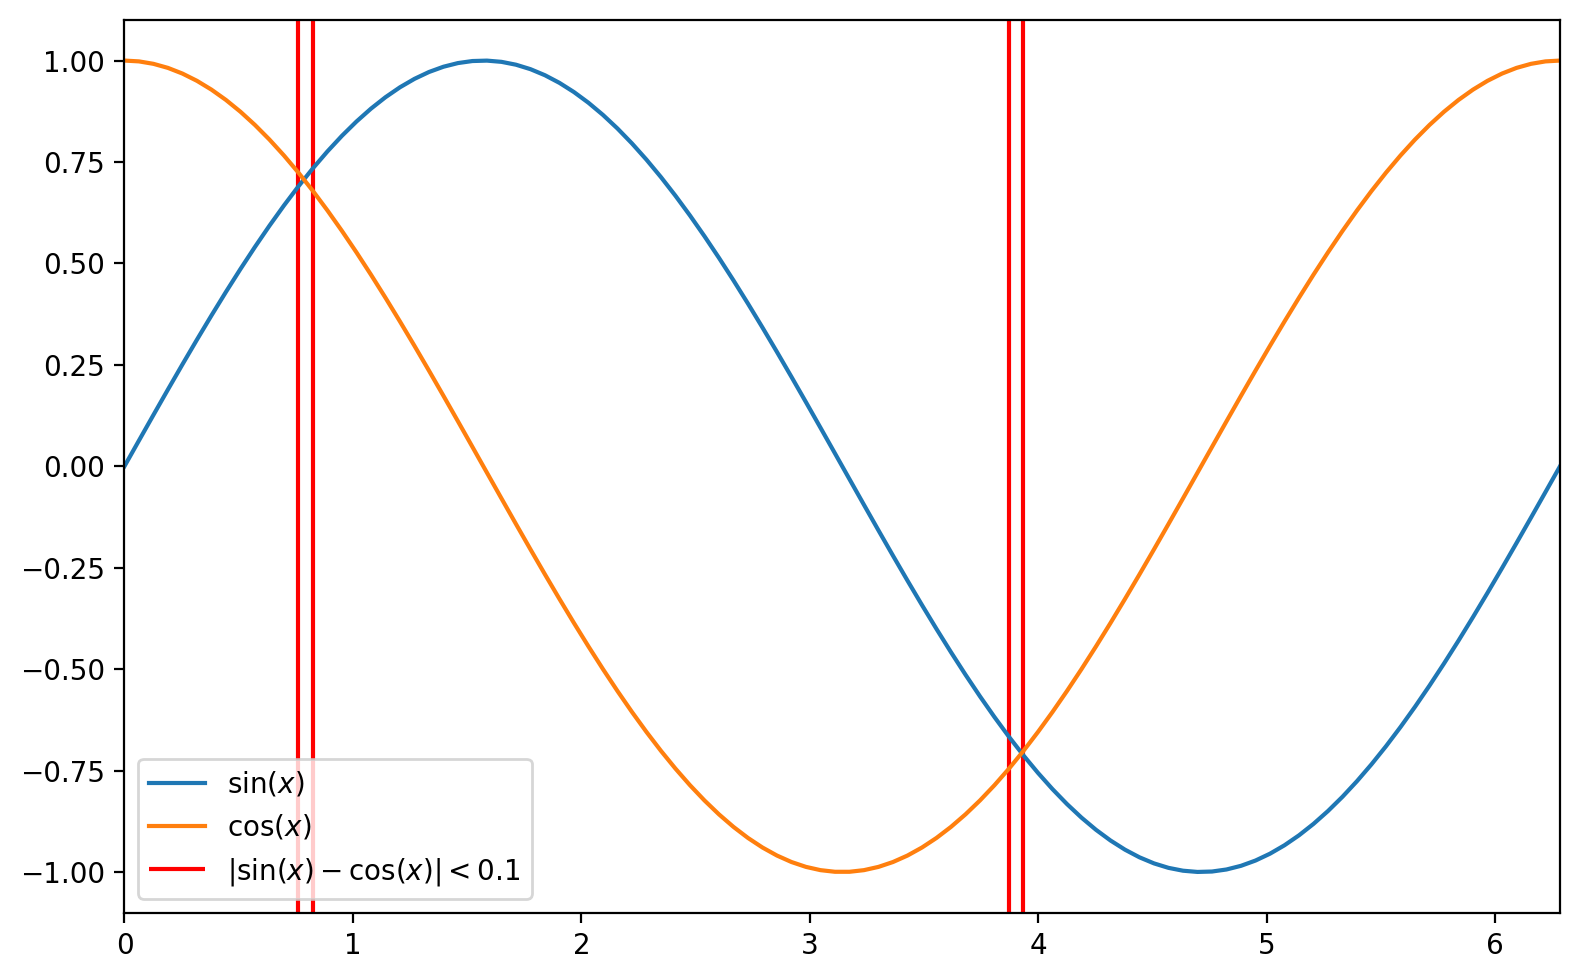

In [114]:
r_space = np.linspace(0, 2*np.pi, num=100)
# Extract every 10th element
r_extracted = r_space[::10]
print('Array from extracted elements '+\
      '(every 10th element in original array):\n',
      r_extracted)
# Reverse the array
print('Reversed array:\n',r_extracted[::-1])
# Extract elements x such that: 
# abs(sin(x) - cos(x)) < 0.1
sin_vals = np.sin(r_space)
cos_vals = np.cos(r_space)
sin_cos_cross_mask = np.abs(sin_vals - cos_vals) < 0.1
sin_cos_cross = r_space[sin_cos_cross_mask].copy()
# Make a plot showing this crossing points
fig, ax = plt.subplots(figsize=(8,5), dpi=200, 
                      nrows=1, ncols=1)
plt.plot(r_space, sin_vals, label=r'$\sin(x)$')
plt.plot(r_space, cos_vals, label=r'$\cos(x)$')
plt.vlines(sin_cos_cross, ymin=-1.1, ymax=1.1, 
           color='r',
           label=r'$|\sin(x)-\cos(x)|<0.1$')
plt.xlim(left=r_space.min(), right=r_space.max())
plt.ylim(top=1.1, bottom=-1.1)
legend = plt.legend()
plt.tight_layout();

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [134]:
a = np.arange(1, 11)
mult_matrix = np.outer(a,a)
print('Multiplication table:')
print(mult_matrix)
# Get the trace
print('\nTrace of the table:',np.trace(mult_matrix))
# Get anti-diagonal
print('\nAnti-diagonal:\n',np.diag(mult_matrix[::-1]))
# Get offset +1 diagonal
print('Upper off-diagonal:\n',np.diag(mult_matrix, k=1))

Multiplication table:
[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

Trace of the table: 385

Anti-diagonal:
 [10 18 24 28 30 30 28 24 18 10]
Upper off-diagonal:
 [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

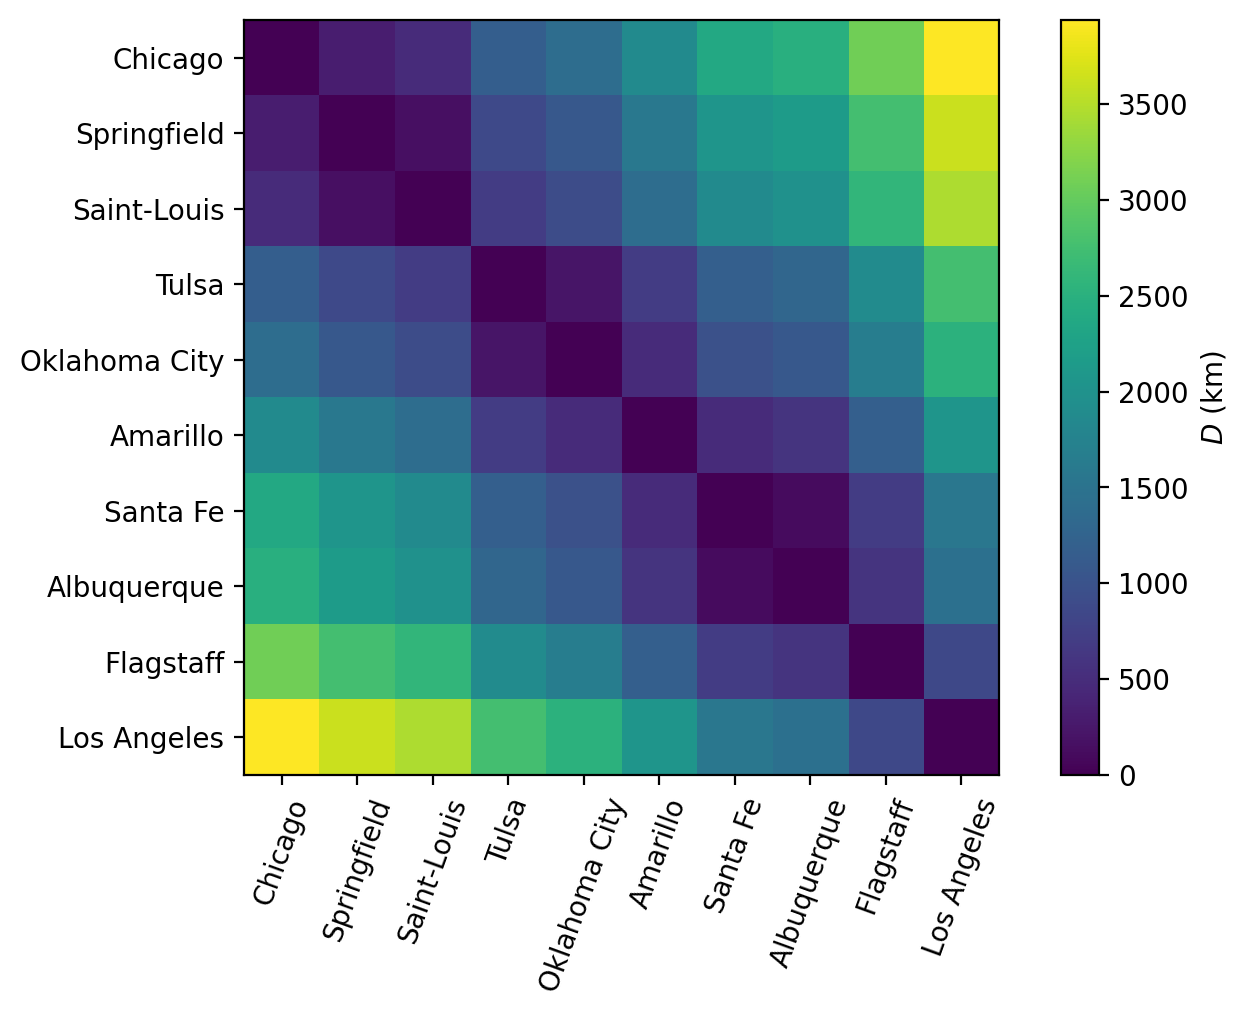

In [155]:
cities = ['Chicago', 'Springfield', 'Saint-Louis', 
          'Tulsa', 'Oklahoma City', 'Amarillo', 
          'Santa Fe', 'Albuquerque', 'Flagstaff', 
          'Los Angeles']
x_pos_miles = np.array([0, 198, 303, 736, 871, 1175, 
                        1475, 1544, 1913, 2448])
# Get distances 
dist_vecs_miles = np.expand_dims(x_pos_miles, axis=-1) - x_pos_miles
dist_miles = np.abs(dist_vecs_miles)
# Convert to km
dist_km = dist_miles * 1.60934
# Plot as a heatmap
fig, ax = plt.subplots(nrows=1, ncols=1, 
                      figsize=(8,5), dpi=200)
img = ax.imshow(dist_km)
cbar = plt.colorbar(mappable=img,ax=ax)
cbar.set_label(r'$D$ (km)')
ax.set_xticks(np.arange(len(cities)))
ax.set_xticklabels(cities, rotation=70)
ax.set_yticks(np.arange(len(cities)))
ax.set_yticklabels(cities);

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [199]:
# Define a function that performs all of the tasks 
# and returns the array of ordered prime nums
def prime_numbers(N=99):
    # Build mask
    mask = np.zeros(shape=(N,))
    # Get integers as indexes of the mask
    nums = np.indices(mask.shape)+1
    # Identify multiples and set mask
    for n in nums[0][1:]:
        mask += (nums % n == 0).flatten()
    return nums[0][mask < 2]

In [200]:
prime_numbers()

array([ 1,  2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53,
       59, 61, 67, 71, 73, 79, 83, 89, 97])

Great, it works! Now let's do some benchmarking.

In [205]:
import timeit

In [219]:
n_loops = 1000
N_vals = [100*(i+1) for i in range(10)]
f_times = []
for N in N_vals:
    f = lambda: prime_numbers(N=N)
    f_times.append(timeit.timeit(f, number=n_loops) / n_loops)

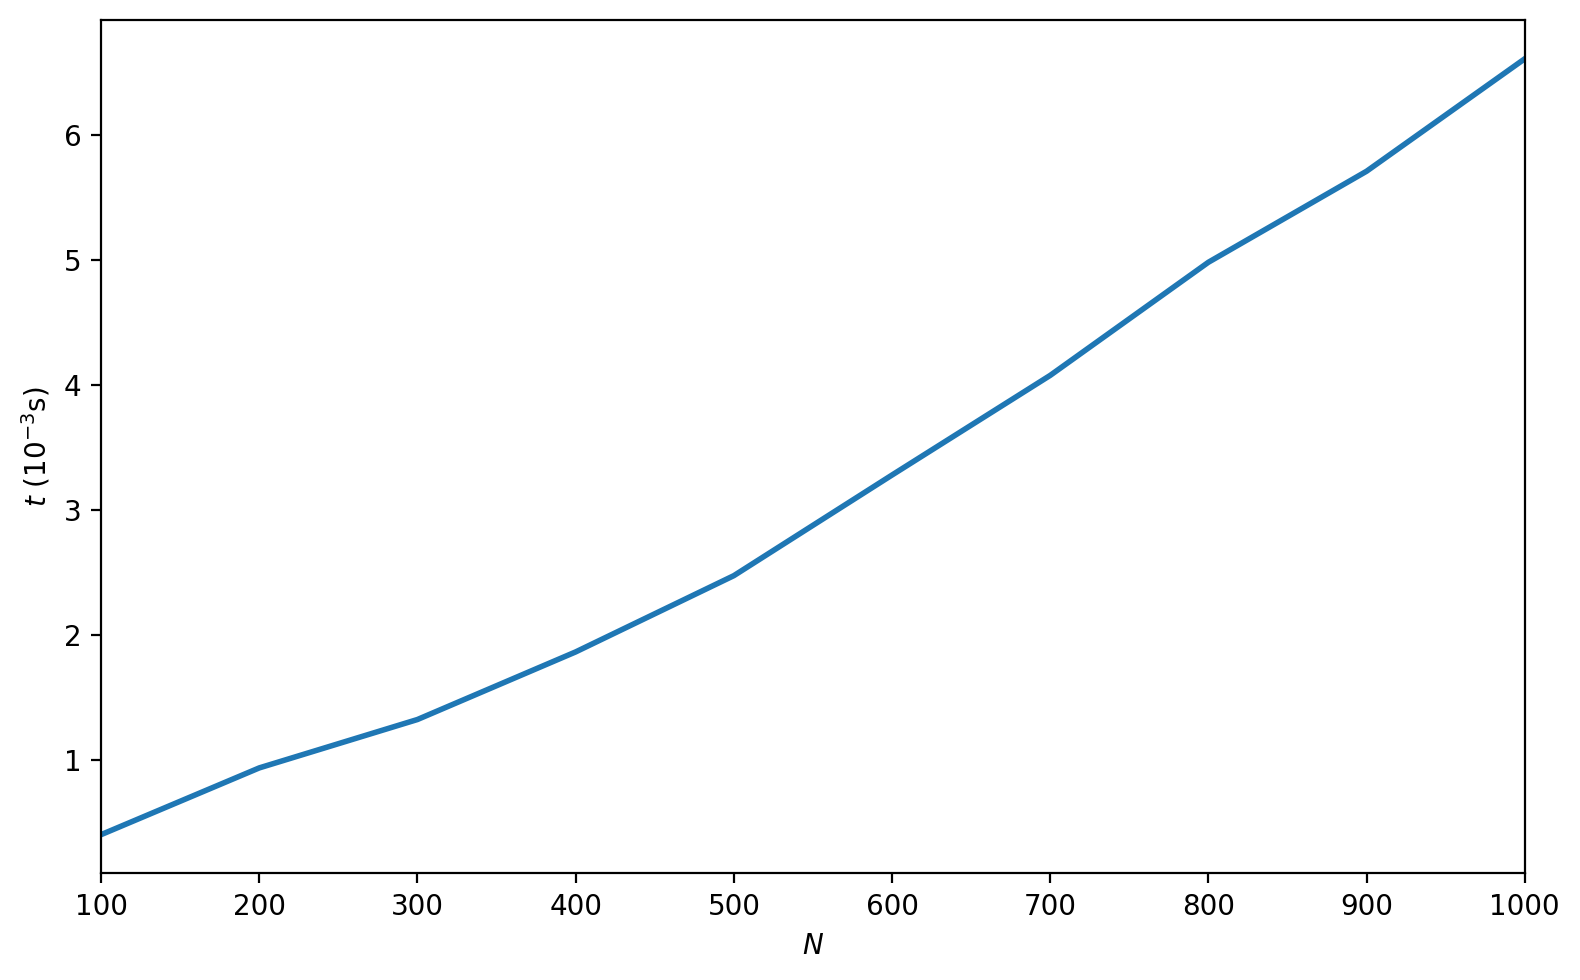

In [228]:
fig, ax = plt.subplots(nrows=1, ncols=1, 
                      figsize=(8,5), dpi=200)
plt.plot(N_vals, np.array(f_times)*1e3, lw=2)
plt.ylabel(r'$t$ ($10^{-3}$s)')
plt.xlabel(r'$N$')
plt.xlim(left=min(N_vals), right=max(N_vals))
plt.tight_layout();

In [253]:
# Now let's optimize this
def prime_numbers_opt(N=99):
    # Build mask
    mask = np.zeros(shape=(N,))
    # Get integers as indexes of the mask
    nums = np.indices(mask.shape)+1
    # Return primes
    return nums[0][np.sum(nums.T % nums == 0, axis=1) < 3]

In [256]:
# Benchmark optimized version
f_times_opt = []
for N in N_vals:
    f = lambda: prime_numbers_opt(N=N)
    f_times_opt.append(timeit.timeit(f, number=n_loops) / n_loops)

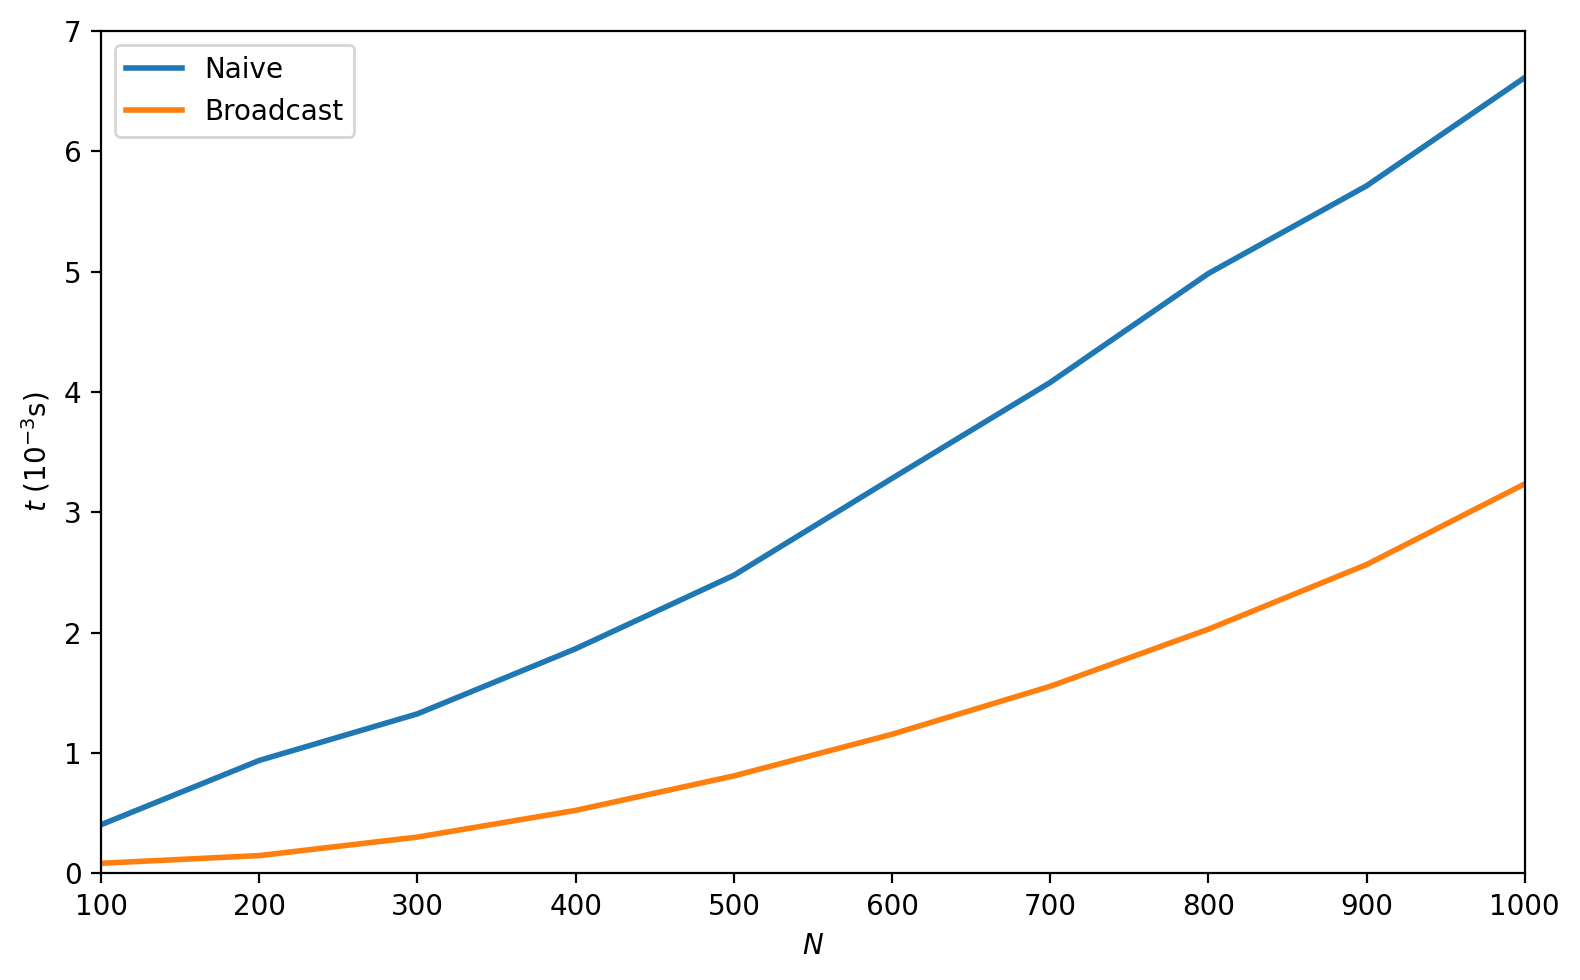

In [258]:
# Compare both versions
fig, ax = plt.subplots(nrows=1, ncols=1, 
                      figsize=(8,5), dpi=200)
plt.plot(N_vals, np.array(f_times)*1e3, lw=2,
         label='Naive')
plt.plot(N_vals, np.array(f_times_opt)*1e3, lw=2,
         label='Broadcast')
plt.ylabel(r'$t$ ($10^{-3}$s)')
plt.xlabel(r'$N$')
plt.ylim(bottom=0, top=7)
plt.xlim(left=min(N_vals), right=max(N_vals))
plt.legend()
plt.tight_layout();

**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [266]:
def random_walk(walkers, steps, seed=42):
    # Set seed
    np.random.seed(seed)
    # Generate steps
    walker_steps = np.random.choice([-1,1], size=(walkers, steps))
    # Initialize trajectories
    walker_paths = walker_steps.copy()
    # For each column sum previous columns
    for i in range(steps-1):
        walker_paths[:,i+1] += np.sum(walker_steps[:,:i+1], 
                                      axis=1)
    return walker_paths

In [307]:
walkers, steps = 1000, 10000
walks = random_walk(walkers,steps)
mean_dist = np.mean(np.abs(walks), axis=0)

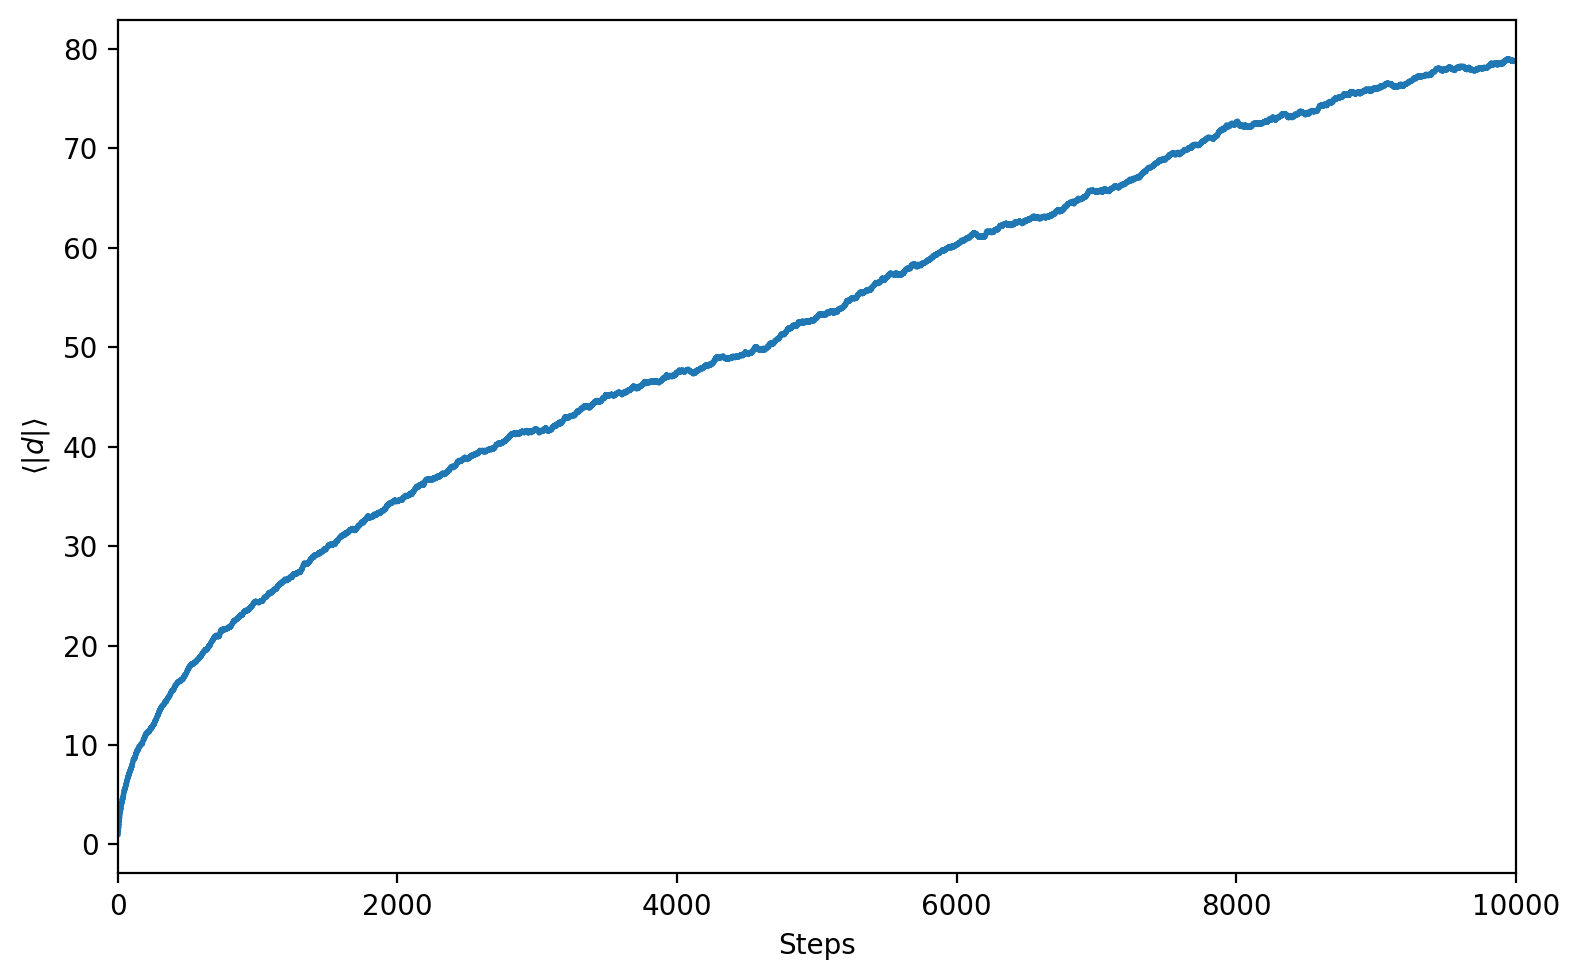

In [308]:
# Plot mean distance over step
fig, ax = plt.subplots(nrows=1, ncols=1, 
                      figsize=(8,5), dpi=200)
plt.plot(np.arange(1,steps+1), mean_dist, lw=2)
plt.ylabel(r'$\langle |d| \rangle$')
plt.xlabel(r'Steps')
plt.xlim(left=0, right=steps)
plt.tight_layout();

In [305]:
try:
    import seaborn as sns
except:
    print('Seaborn is not installed')

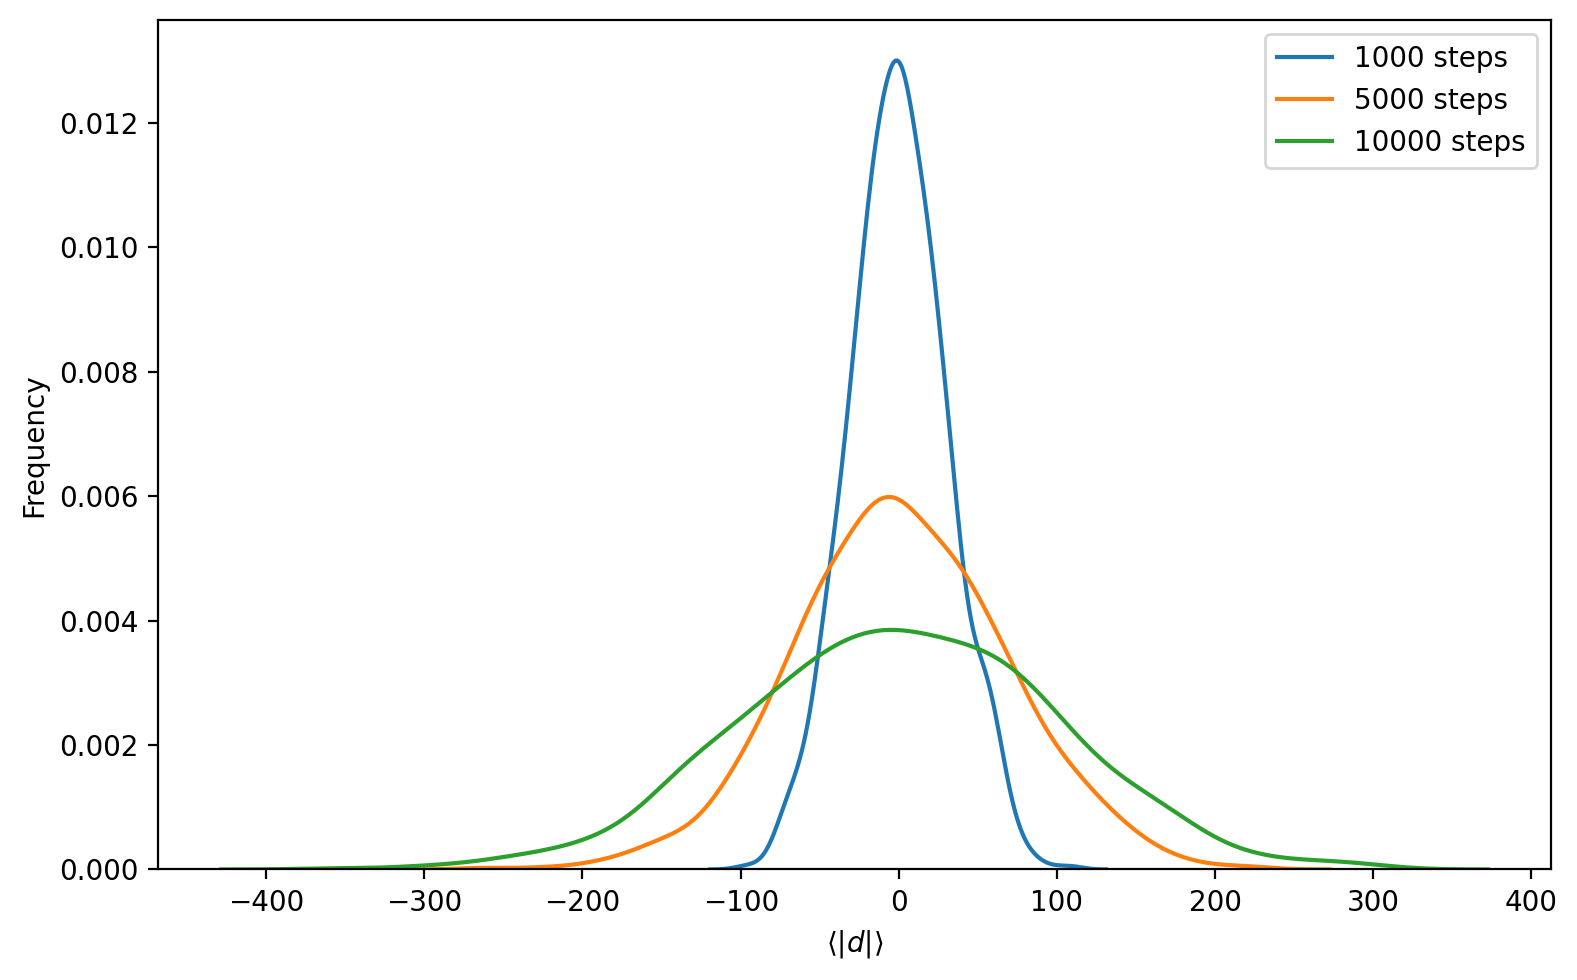

In [309]:
# Use a try in case the user does not have 
# seaborn installed
try:
    # Plot distribution at different steps
    fig, ax = plt.subplots(nrows=1, ncols=1, 
                          figsize=(8,5), dpi=200)
    sns.kdeplot(walks[:,(steps-1)//10], label='%d steps' % (steps//10))
    sns.kdeplot(walks[:,(steps-1)//2], label='%d steps' % (steps//2))
    sns.kdeplot(walks[:,steps-1], label='%d steps' % (steps))
    plt.ylabel(r'Frequency')
    plt.xlabel(r'$\langle |d| \rangle$')
    plt.legend()
    plt.tight_layout()
except:
    print('Could not render plot')

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.